In [1]:
import tensorflow

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import load_model
import numpy as np

In [33]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [43]:
!C:/Users/Admin/Downloads/dataset/dataset

'C:/Users/Admin/Downloads/dataset/dataset' is not recognized as an internal or external command,
operable program or batch file.


In [32]:
train_ds = train_datagen.flow_from_directory('C:/Users/Admin/Downloads/dataset/dataset/train_set', target_size=(64, 64), class_mode='categorical', batch_size=5, color_mode='rgb')

test_ds = train_datagen.flow_from_directory('C:/Users/Admin/Downloads/dataset/dataset/test_set', target_size=(64, 64), class_mode='categorical', batch_size=5,color_mode='rgb')

Found 742 images belonging to 4 classes.
Found 198 images belonging to 4 classes.


In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(32,(3,3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)       

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(train_ds,
                    steps_per_epoch = len(train_ds),
                    epochs = 20,
                    validation_data = test_ds,
                    validation_steps = len(test_ds))
    

Epoch 1/20
149/149 [==============================] - 16s 103ms/step - loss: 1.3048 - accuracy: 0.3841 - val_loss: 1.2065 - val_accuracy: 0.4949
Epoch 2/20
149/149 [==============================] - 15s 99ms/step - loss: 1.0229 - accuracy: 0.5350 - val_loss: 0.9348 - val_accuracy: 0.5859
Epoch 3/20
149/149 [==============================] - 15s 97ms/step - loss: 0.8871 - accuracy: 0.6105 - val_loss: 0.8553 - val_accuracy: 0.6869
Epoch 4/20
149/149 [==============================] - 14s 96ms/step - loss: 0.8328 - accuracy: 0.6658 - val_loss: 0.7793 - val_accuracy: 0.7424
Epoch 5/20
149/149 [==============================] - 15s 99ms/step - loss: 0.7483 - accuracy: 0.6954 - val_loss: 0.7466 - val_accuracy: 0.6919
Epoch 6/20
149/149 [==============================] - 15s 98ms/step - loss: 0.6760 - accuracy: 0.7493 - val_loss: 0.6401 - val_accuracy: 0.7525
Epoch 7/20
149/149 [==============================] - 14s 97ms/step - loss: 0.6563 - accuracy: 0.7399 - val_loss: 0.6133 - val_accuracy

In [34]:
model.save('model.h5')

In [35]:
result = model.evaluate(test_ds)

40/40 [==============================] - 3s 60ms/step - loss: 0.5957 - accuracy: 0.7980


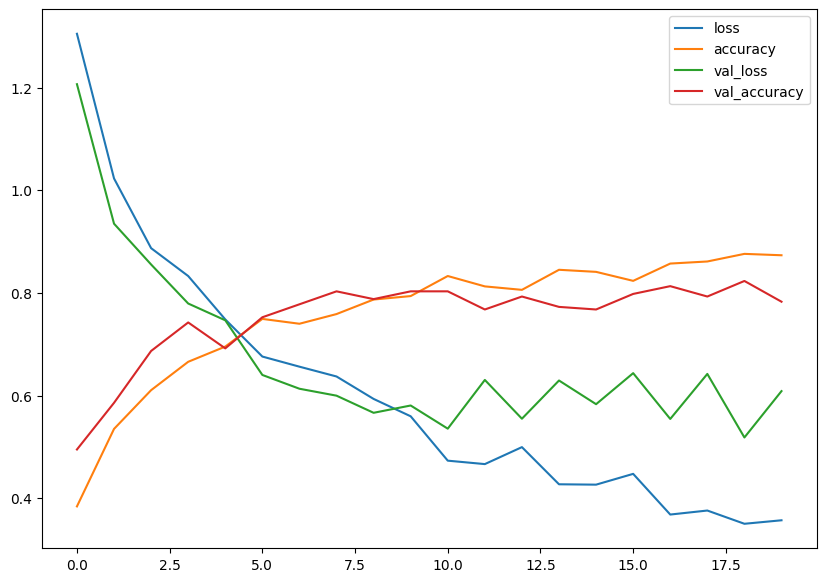

In [36]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));

In [37]:
from keras.preprocessing import image

In [38]:
model = load_model('model.h5')

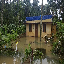

In [40]:
img = image.load_img("C:/Users/Admin/Downloads/dataset/dataset/test_set/Flood/1015.jpg", target_size = (64, 64))
img

In [41]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
pred = np.argmax(model.predict(x), axis=-1)
pred

1/1 [==============================] - 0s 119ms/step


array([2], dtype=int64)

In [42]:
index = ['Cyclone', 'Earthquake', 'Flood', 'WildFire']
result = np.array(index[pred[0]])
result

array('Flood', dtype='<U5')